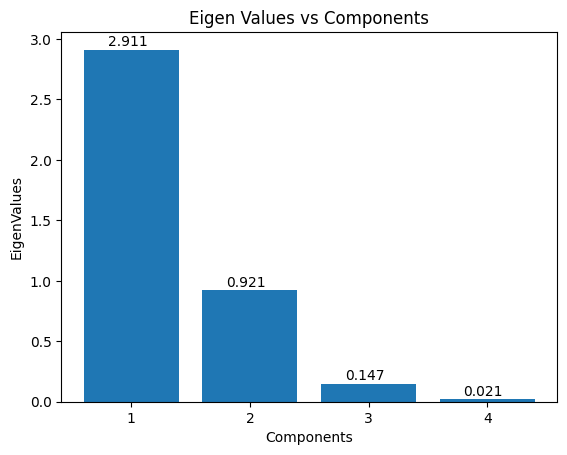

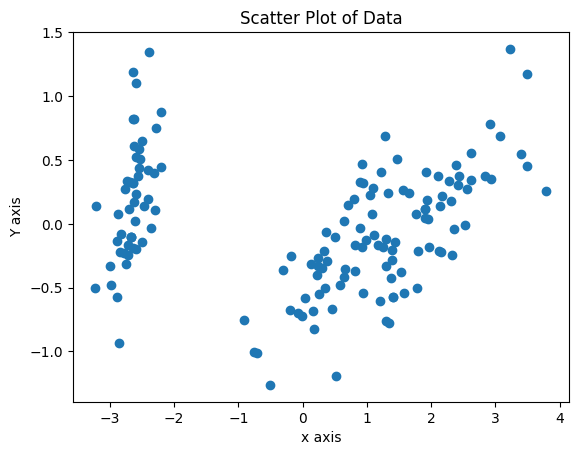

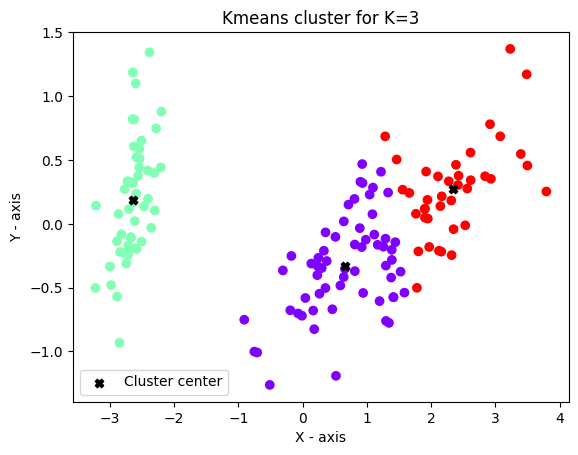

Distortion measure is: 63.873838060362196

The purity score is: 0.8866666666666667


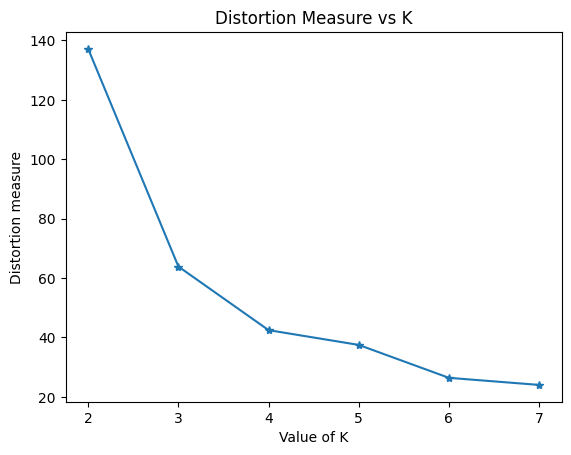

[0.6666666666666666, 0.8866666666666667, 0.72, 0.66, 0.5666666666666667, 0.47333333333333333]


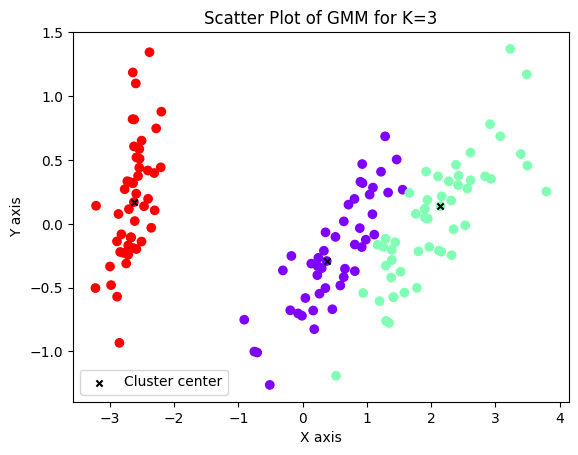

Distortion Measure is: -280.8695650450793
Purity Score is: 0.98


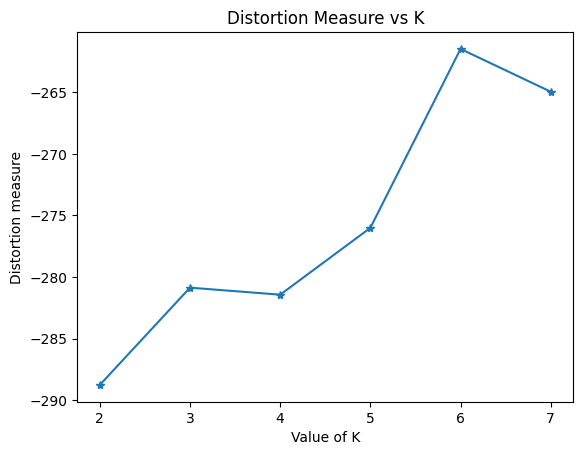

[0.6666666666666666, 0.98, 0.76, 0.7666666666666667, 0.6866666666666666, 0.5933333333333334]
[-288.76731564769796, -280.86956504507936, -281.4388190010576, -276.01059071040413, -261.4799509220502, -264.9560559960841]


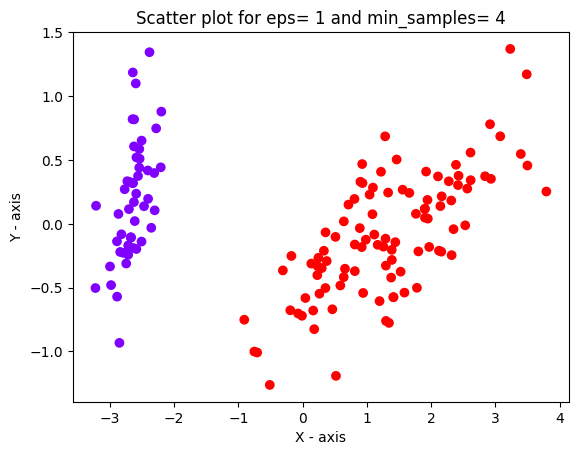

Purity score for eps= 1 and min_samples= 4 is: 0.6666666666666666


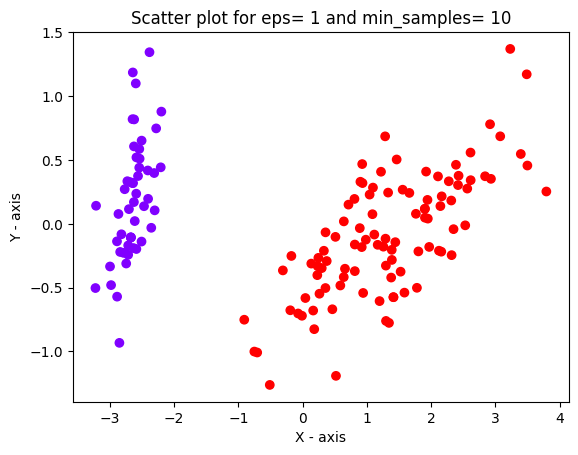

Purity score for eps= 1 and min_samples= 10 is: 0.6666666666666666


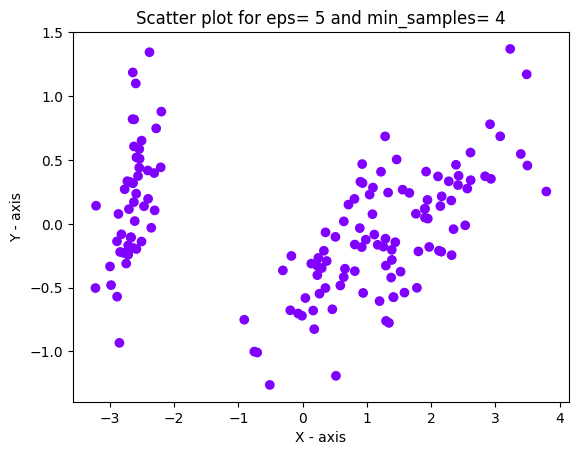

Purity score for eps= 5 and min_samples= 4 is: 0.3333333333333333


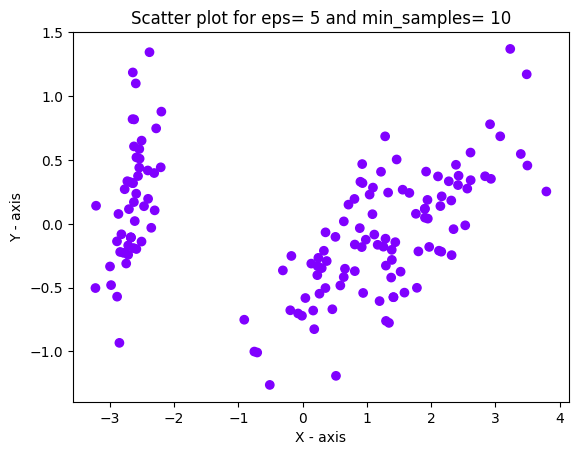

Purity score for eps= 5 and min_samples= 10 is: 0.3333333333333333


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  3 19:36:55 2022

@author: Ayush
"""

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import scipy 

# Reading CSV file
df = pd.read_csv('Iris.csv')

# Dropping the 'Species' column for PCA
df_q1 = df.drop(columns=["Species"], axis=1)
standard = preprocessing.scale(df_q1)

# Plotting the eigenvalues of the correlation matrix
corr_matrix = df_q1.corr()
evalues, evectors = np.linalg.eig(corr_matrix)
plt.xlabel("Components")
plt.ylabel("EigenValues")
plt.title("Eigen Values vs Components")
plt.bar([1, 2, 3, 4], evalues)
plt.xticks(np.arange(1, 5, 1))
for i, v in enumerate(evalues):
    plt.text(i + 0.8, v + 0.03, str(round(v, 3)))
plt.show()

# Applying PCA to reduce data to 2 dimensions
pca_into_2 = PCA(n_components=2)
pca_into_2.fit(df_q1)
reduced_data_into_2 = pca_into_2.transform(df_q1)
reduced_df = pd.DataFrame(reduced_data_into_2, columns=['A', 'B'])

# Scatter plot of the reduced data
plt.scatter(reduced_df['A'], reduced_df['B'])
plt.title("Scatter Plot of Data")
plt.xlabel("x axis")
plt.ylabel("Y axis")
plt.show()

# K-means clustering with K=3
km = KMeans(n_clusters=3)
km.fit(reduced_df)
kmeans_prediction = km.predict(reduced_df)
kmeans_center_x = []
kmeans_center_y = []
for i in km.cluster_centers_:
    kmeans_center_x.append(i[0])
    kmeans_center_y.append(i[1])

data_with_clusters = reduced_df.copy()
data_with_clusters['Clusters'] = kmeans_prediction


# Plot the data points with different colors for each cluster
plt.scatter(data_with_clusters['A'], data_with_clusters['B'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.scatter(kmeans_center_x, kmeans_center_y, marker='X', color='black', label='Cluster center')
plt.title('Kmeans cluster for K=3')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()

# Calculation of distortion measure
kmeans_distortion = km.inertia_
print('Distortion measure is:', kmeans_distortion)
print()

# Function to calculate purity score
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    return contingency_matrix[row_ind, col_ind].sum() / np.sum(contingency_matrix)

print("The purity score is:", purity_score(df["Species"], kmeans_prediction))

# K-means clustering for different values of K

lst = [2, 3, 4, 5, 6, 7]
pscore_lst = []          # List to store purity scores
distortion_lst = []      # List to store distortion measures

for i in lst:
    km = KMeans(n_clusters=i)
    km.fit(reduced_df)
    kmeans_prediction = km.predict(reduced_df)
    kmeans_distortion = km.inertia_
    ps = purity_score(df["Species"], kmeans_prediction)
    pscore_lst.append(ps)
    distortion_lst.append(kmeans_distortion)

# Plotting K vs distortion measure
plt.plot(lst, distortion_lst, marker="*")
plt.xlabel("Value of K")
plt.ylabel("Distortion measure")
plt.title("Distortion Measure vs K")
plt.show()

print(pscore_lst)

# Gaussian Mixture Model (GMM) clustering with K=3

GMM = GaussianMixture(n_components=3)
GMM.fit(reduced_df)
GMM_prediction = GMM.predict(reduced_df)
data_with_gmm_clusters = reduced_df.copy()
data_with_gmm_clusters['Clusters'] = GMM_prediction

GMM_features_value = reduced_df.values
GMM_centers = np.empty(shape=(GMM.n_components, GMM_features_value.shape[1]))

for i in range(GMM.n_components):
    density = scipy.stats.multivariate_normal(cov=GMM.covariances_[i], mean=GMM.means_[i]).logpdf(reduced_df)
    GMM_centers[i, :] = GMM_features_value[np.argmax(density)]

plt.scatter(data_with_gmm_clusters['A'], data_with_gmm_clusters['B'], c=data_with_gmm_clusters['Clusters'], cmap='rainbow')
plt.scatter(GMM_centers[:, 0], GMM_centers[:, 1], s=20, marker='x', color='black', label='Cluster center')
plt.title('Scatter Plot of GMM for K=3')
plt.legend()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

print("Distortion Measure is:", sum(GMM.score_samples(reduced_df)))

print("Purity Score is:", purity_score(df["Species"], GMM_prediction))

# GMM clustering for different values of K

lst = [2, 3, 4, 5, 6, 7]
pscore_lst = []
distortion_lst = []

for k in lst:
    GMM = GaussianMixture(n_components=k)
    GMM.fit(reduced_df)
    GMM_prediction = GMM.predict(reduced_df)
    gmm_features_value = reduced_df.values

    gmm_centers = np.empty(shape=(GMM.n_components, gmm_features_value.shape[1]))

    for i in range(GMM.n_components):
        density = scipy.stats.multivariate_normal(cov=GMM.covariances_[i], mean=GMM.means_[i]).logpdf(reduced_df)
        gmm_centers[i, :] = gmm_features_value[np.argmax(density)]

    gmm_distortion = sum(GMM.score_samples(reduced_df))
    distortion_lst.append(gmm_distortion)
    pscore_lst.append(purity_score(df['Species'], GMM_prediction))

# Plotting K vs distortion measure for GMM
plt.plot(lst, distortion_lst, marker="*")
plt.xlabel("Value of K")
plt.ylabel("Distortion measure")
plt.title("Distortion Measure vs K")
plt.show()

print(pscore_lst)
print(distortion_lst)

# DBSCAN clustering for different values of eps and min_samples

def dbscan_model(DATA, r_d, e, s):
    dbscan_model = DBSCAN(eps=e, min_samples=s).fit(r_d)
    DBSCAN_predictions = dbscan_model.labels_

    data_with_dbscan_clusters = r_d.copy()
    data_with_dbscan_clusters['Clusters'] = DBSCAN_predictions

    plt.scatter(data_with_dbscan_clusters['A'], data_with_dbscan_clusters['B'], c=data_with_dbscan_clusters['Clusters'], cmap='rainbow')
    plt.title(f'Scatter plot for eps= {e} and min_samples= {s}')
    plt.xlabel('X - axis')
    plt.ylabel('Y - axis')
    plt.show()

    print(f'Purity score for eps= {e} and min_samples= {s} is:', purity_score(y_true=DATA['Species'], y_pred=DBSCAN_predictions))

# Testing DBSCAN with different parameters
dbscan_model(df, reduced_df, 1, 4)
dbscan_model(df, reduced_df, 1, 10)
dbscan_model(df, reduced_df, 5, 4)
dbscan_model(df, reduced_df, 5, 10)
